In [2]:
import warnings

# Ignorar quaisquer avisos para manter a saída limpa
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode

# Conectar o Plotly ao notebook
init_notebook_mode(connected=True)

# Definir o caminho para o conjunto de dados
path_to_dataset = '/home/est.andrew/Downloads/diabetes.xls'

# Ler o conjunto de dados em um DataFrame do pandas
df = pd.read_csv(path_to_dataset)

# Criar uma cópia do DataFrame para fins de visualização
df1 = pd.DataFrame(df)

# Exibir as primeiras linhas do DataFrame para garantir que os dados tenham sido lidos com sucesso
df1

,id,chol,stab.glu,hdl,ratio,glyhb,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn
0,1000,203.0,82,56.0,3.6,4.310000,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0
1,1001,165.0,97,24.0,6.9,4.440000,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0
2,1002,228.0,92,37.0,6.2,4.640000,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0
3,1003,78.0,93,12.0,6.5,4.630000,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0
4,1005,249.0,90,28.0,8.9,7.720000,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,41506,296.0,369,46.0,6.4,16.110001,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0
399,41507,284.0,89,54.0,5.3,4.390000,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0
400,41510,194.0,269,38.0,5.1,13.630000,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0
401,41752,199.0,76,52.0,3.8,4.490000,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0


In [3]:
# Imprimir a forma (número de linhas e colunas) do DataFrame df1
print(df1.shape)

(403, 19)


In [4]:
# Remover a coluna "id" do DataFrame df1
df1.drop(columns=["id"], inplace=True)

In [5]:
# Criar uma cópia do DataFrame df1 e armazená-la em df2
df2 = df1.copy()

# Remover a coluna "glyhb" do DataFrame df2
df2.drop(columns=["glyhb"], inplace=True)

In [6]:
# Inserir a coluna "glyhb" do DataFrame df1 na posição 17 do DataFrame df2
df2.insert(17, "glyhb", df1["glyhb"])

In [7]:
df2

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb
0,203.0,82,56.0,3.6,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,NaN,NaN,29.0,38.0,720.0,4.310000
1,165.0,97,24.0,6.9,Buckingham,29,female,64.0,218.0,large,112.0,68.0,NaN,NaN,46.0,48.0,360.0,4.440000
2,228.0,92,37.0,6.2,Buckingham,58,female,61.0,256.0,large,190.0,92.0,185.0,92.0,49.0,57.0,180.0,4.640000
3,78.0,93,12.0,6.5,Buckingham,67,male,67.0,119.0,large,110.0,50.0,NaN,NaN,33.0,38.0,480.0,4.630000
4,249.0,90,28.0,8.9,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,NaN,NaN,44.0,41.0,300.0,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,Louisa,53,male,69.0,173.0,medium,138.0,94.0,130.0,94.0,35.0,39.0,210.0,16.110001
399,284.0,89,54.0,5.3,Louisa,51,female,63.0,154.0,medium,140.0,100.0,146.0,102.0,32.0,43.0,180.0,4.390000
400,194.0,269,38.0,5.1,Louisa,29,female,69.0,167.0,small,120.0,70.0,NaN,NaN,33.0,40.0,20.0,13.630000
401,199.0,76,52.0,3.8,Louisa,41,female,63.0,197.0,medium,120.0,78.0,NaN,NaN,41.0,48.0,255.0,4.490000


In [8]:
# Exibir informações sobre o DataFrame df2, incluindo o tipo de dados de cada coluna e o uso de memória
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 403 entries, 0 to 402
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   chol      402 non-null    float64
 1   stab.glu  403 non-null    int64  
 2   hdl       402 non-null    float64
 3   ratio     402 non-null    float64
 4   location  403 non-null    object 
 5   age       403 non-null    int64  
 6   gender    403 non-null    object 
 7   height    398 non-null    float64
 8   weight    402 non-null    float64
 9   frame     391 non-null    object 
 10  bp.1s     398 non-null    float64
 11  bp.1d     398 non-null    float64
 12  bp.2s     141 non-null    float64
 13  bp.2d     141 non-null    float64
 14  waist     401 non-null    float64
 15  hip       401 non-null    float64
 16  time.ppn  400 non-null    float64
 17  glyhb     390 non-null    float64
dtypes: float64(13), int64(2), object(3)
memory usage: 56.8+ KB


In [9]:
# Definir estilos para a tabela
Styles = [{
    "selector": "caption",
    "props": [
        ("color", "white"),
        ("text-align", "center"),
        ("font-size", "15pt"),
        ("background-color", "#20354a")
    ]
}]

In [10]:
# Criar um estilo para as 10 primeiras linhas do DataFrame
first_data = df2.head(10).style.set_caption("Os 10 primeiros dados").set_table_styles(Styles)

# Definir propriedades adicionais para o estilo
first_data.set_properties(**{
    "background-color": "#acc4db",
    "color": "black",
    "border-color": "#243c54"
})

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb
0,203.000000,82,56.000000,3.600000,Buckingham,46,female,62.000000,121.000000,medium,118.000000,59.000000,nan,nan,29.000000,38.000000,720.000000,4.310000
1,165.000000,97,24.000000,6.900000,Buckingham,29,female,64.000000,218.000000,large,112.000000,68.000000,nan,nan,46.000000,48.000000,360.000000,4.440000
2,228.000000,92,37.000000,6.200000,Buckingham,58,female,61.000000,256.000000,large,190.000000,92.000000,185.000000,92.000000,49.000000,57.000000,180.000000,4.640000
3,78.000000,93,12.000000,6.500000,Buckingham,67,male,67.000000,119.000000,large,110.000000,50.000000,nan,nan,33.000000,38.000000,480.000000,4.630000
4,249.000000,90,28.000000,8.900000,Buckingham,64,male,68.000000,183.000000,medium,138.000000,80.000000,nan,nan,44.000000,41.000000,300.000000,7.720000
5,248.000000,94,69.000000,3.600000,Buckingham,34,male,71.000000,190.000000,large,132.000000,86.000000,nan,nan,36.000000,42.000000,195.000000,4.810000
6,195.000000,92,41.000000,4.800000,Buckingham,30,male,69.000000,191.000000,medium,161.000000,112.000000,161.000000,112.000000,46.000000,49.000000,720.000000,4.840000
7,227.000000,75,44.000000,5.200000,Buckingham,37,male,59.000000,170.000000,medium,nan,nan,nan,nan,34.000000,39.000000,1020.000000,3.940000
8,177.000000,87,49.000000,3.600000,Buckingham,45,male,69.000000,166.000000,large,160.000000,80.000000,128.000000,86.000000,34.000000,40.000000,300.000000,4.840000
9,263.000000,89,40.000000,6.600000,Buckingham,55,female,63.000000,202.000000,small,108.000000,72.000000,nan,nan,45.000000,50.000000,240.000000,5.780000


In [11]:
# Criar um estilo para as 10 últimas linhas do DataFrame
last_data = df2.tail(10).style.set_caption("Os últimos 10 dados").set_table_styles(Styles)

# Definir propriedades adicionais para o estilo
last_data.set_properties(**{
    "background-color": "#acc4db",
    "color": "black",
    "border-color": "#243c54"
})

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,bp.2s,bp.2d,waist,hip,time.ppn,glyhb
393,192.000000,85,69.000000,2.800000,Louisa,51,male,65.000000,146.000000,large,130.000000,110.000000,170.000000,118.000000,nan,nan,60.000000,4.380000
394,169.000000,104,58.000000,2.900000,Louisa,25,female,60.000000,154.000000,medium,140.000000,95.000000,130.000000,94.000000,40.000000,42.000000,60.000000,4.820000
395,179.000000,85,50.000000,3.600000,Louisa,37,male,66.000000,136.000000,medium,190.000000,94.000000,172.000000,100.000000,33.000000,39.000000,480.000000,4.990000
396,216.000000,84,64.000000,3.400000,Louisa,54,female,66.000000,168.000000,medium,132.000000,90.000000,126.000000,80.000000,38.000000,42.000000,330.000000,nan
397,301.000000,90,118.000000,2.600000,Louisa,89,female,61.000000,115.000000,medium,218.000000,90.000000,238.000000,90.000000,31.000000,41.000000,210.000000,4.280000
398,296.000000,369,46.000000,6.400000,Louisa,53,male,69.000000,173.000000,medium,138.000000,94.000000,130.000000,94.000000,35.000000,39.000000,210.000000,16.110001
399,284.000000,89,54.000000,5.300000,Louisa,51,female,63.000000,154.000000,medium,140.000000,100.000000,146.000000,102.000000,32.000000,43.000000,180.000000,4.390000
400,194.000000,269,38.000000,5.100000,Louisa,29,female,69.000000,167.000000,small,120.000000,70.000000,nan,nan,33.000000,40.000000,20.000000,13.630000
401,199.000000,76,52.000000,3.800000,Louisa,41,female,63.000000,197.000000,medium,120.000000,78.000000,nan,nan,41.000000,48.000000,255.000000,4.490000
402,159.000000,88,79.000000,2.000000,Louisa,68,female,64.000000,220.000000,medium,100.000000,72.000000,nan,nan,49.000000,58.000000,900.000000,nan


In [12]:
def describe(df):
    # Listas para armazenar os valores descritivos
    column = []
    count = []
    dtype = []
    unique = []
    missing = []
    min_ = []
    max_ = []

    # Iterar sobre as colunas do DataFrame
    for col_name in df.columns:
        # Adicionar os nomes das colunas
        column.append(col_name)
        # Contar o número de valores na coluna
        count.append(len(df[col_name]))
        # Obter o tipo de dados da coluna
        dtype.append(df[col_name].dtype)
        # Calcular o número de valores únicos na coluna
        unique.append(df[col_name].nunique())
        # Calcular o número de valores ausentes na coluna
        missing.append(df[col_name].isna().sum())
        # Verificar se a coluna é numérica
        if df[col_name].dtype == "int64" or df[col_name].dtype == "float64":
            # Calcular o valor mínimo na coluna
            min_.append(df[col_name].min())
            # Calcular o valor máximo na coluna
            max_.append(df[col_name].max())
        else:
            # Se não for numérica, adicionar "NaN" para mínimo e máximo
            min_.append("NaN")
            max_.append("NaN")

    # Criar DataFrame de saída
    out_put = pd.DataFrame({
        "Column": column,
        "Count": count,
        "Dtype": dtype,
        "Unique": unique,
        "Missing_value": missing,
        "Min": min_,
        "Max": max_
    })

    return out_put

In [13]:
describe(df2)

,Column,Count,Dtype,Unique,Missing_value,Min,Max
0,chol,403,float64,154,1,78.0,443.0
1,stab.glu,403,int64,116,0,48,385
2,hdl,403,float64,77,1,12.0,120.0
3,ratio,403,float64,69,1,1.5,19.299999
4,location,403,object,2,0,NaN,NaN
5,age,403,int64,68,0,19,92
6,gender,403,object,2,0,NaN,NaN
7,height,403,float64,22,5,52.0,76.0
8,weight,403,float64,140,1,99.0,325.0
9,frame,403,object,3,12,NaN,NaN


In [14]:
# Criar uma cópia do DataFrame df2 e armazená-la em df3
df3 = df2.copy()

# Remover as colunas "bp.2s" e "bp.2d" do DataFrame df3
df3.drop(columns=["bp.2s", "bp.2d"], inplace=True)

# Exibir o DataFrame df3
df3

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,glyhb
0,203.0,82,56.0,3.6,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,4.310000
1,165.0,97,24.0,6.9,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,4.440000
2,228.0,92,37.0,6.2,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,4.640000
3,78.0,93,12.0,6.5,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,4.630000
4,249.0,90,28.0,8.9,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,296.0,369,46.0,6.4,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,16.110001
399,284.0,89,54.0,5.3,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,4.390000
400,194.0,269,38.0,5.1,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,13.630000
401,199.0,76,52.0,3.8,Louisa,41,female,63.0,197.0,medium,120.0,78.0,41.0,48.0,255.0,4.490000


In [15]:
# Exibir estatísticas descritivas para o DataFrame df3
df3.describe()

,Column,Count,Dtype,Unique,Missing_value,Min,Max
0,chol,403,float64,154,1,78.0,443.0
1,stab.glu,403,int64,116,0,48,385
2,hdl,403,float64,77,1,12.0,120.0
3,ratio,403,float64,69,1,1.5,19.299999
4,location,403,object,2,0,NaN,NaN
5,age,403,int64,68,0,19,92
6,gender,403,object,2,0,NaN,NaN
7,height,403,float64,22,5,52.0,76.0
8,weight,403,float64,140,1,99.0,325.0
9,frame,403,object,3,12,NaN,NaN


In [16]:
# Remover linhas contendo valores ausentes (NaN) do DataFrame df3
df3 = df3.dropna()

# Resetar o índice do DataFrame df3 após a remoção das linhas
df3 = df3.reset_index(drop=True)

In [17]:
# Lista das características numéricas
numeric_features = ['chol', 'stab.glu', 'hdl', 'ratio', 'age', 'height', 'weight', 'bp.1s', 'bp.1d', 'waist', 'hip', 'time.ppn']

# Lista das características categóricas
categorical = ['gender', 'location', 'frame']

In [19]:
# Criar um subplot com o número de linhas igual ao número de características numéricas
fig = make_subplots(rows=len(numeric_features), cols=1)

# Adicionar um gráfico de caixa (box plot) para cada característica numérica ao subplot
for i, f in enumerate(numeric_features):
    fig.add_trace(go.Box(x=df3[f], name=f), row=i+1, col=1)

# Atualizar o layout do subplot
fig.update_layout(height=3000, width=1000)

# Exibir o subplot
fig.show()

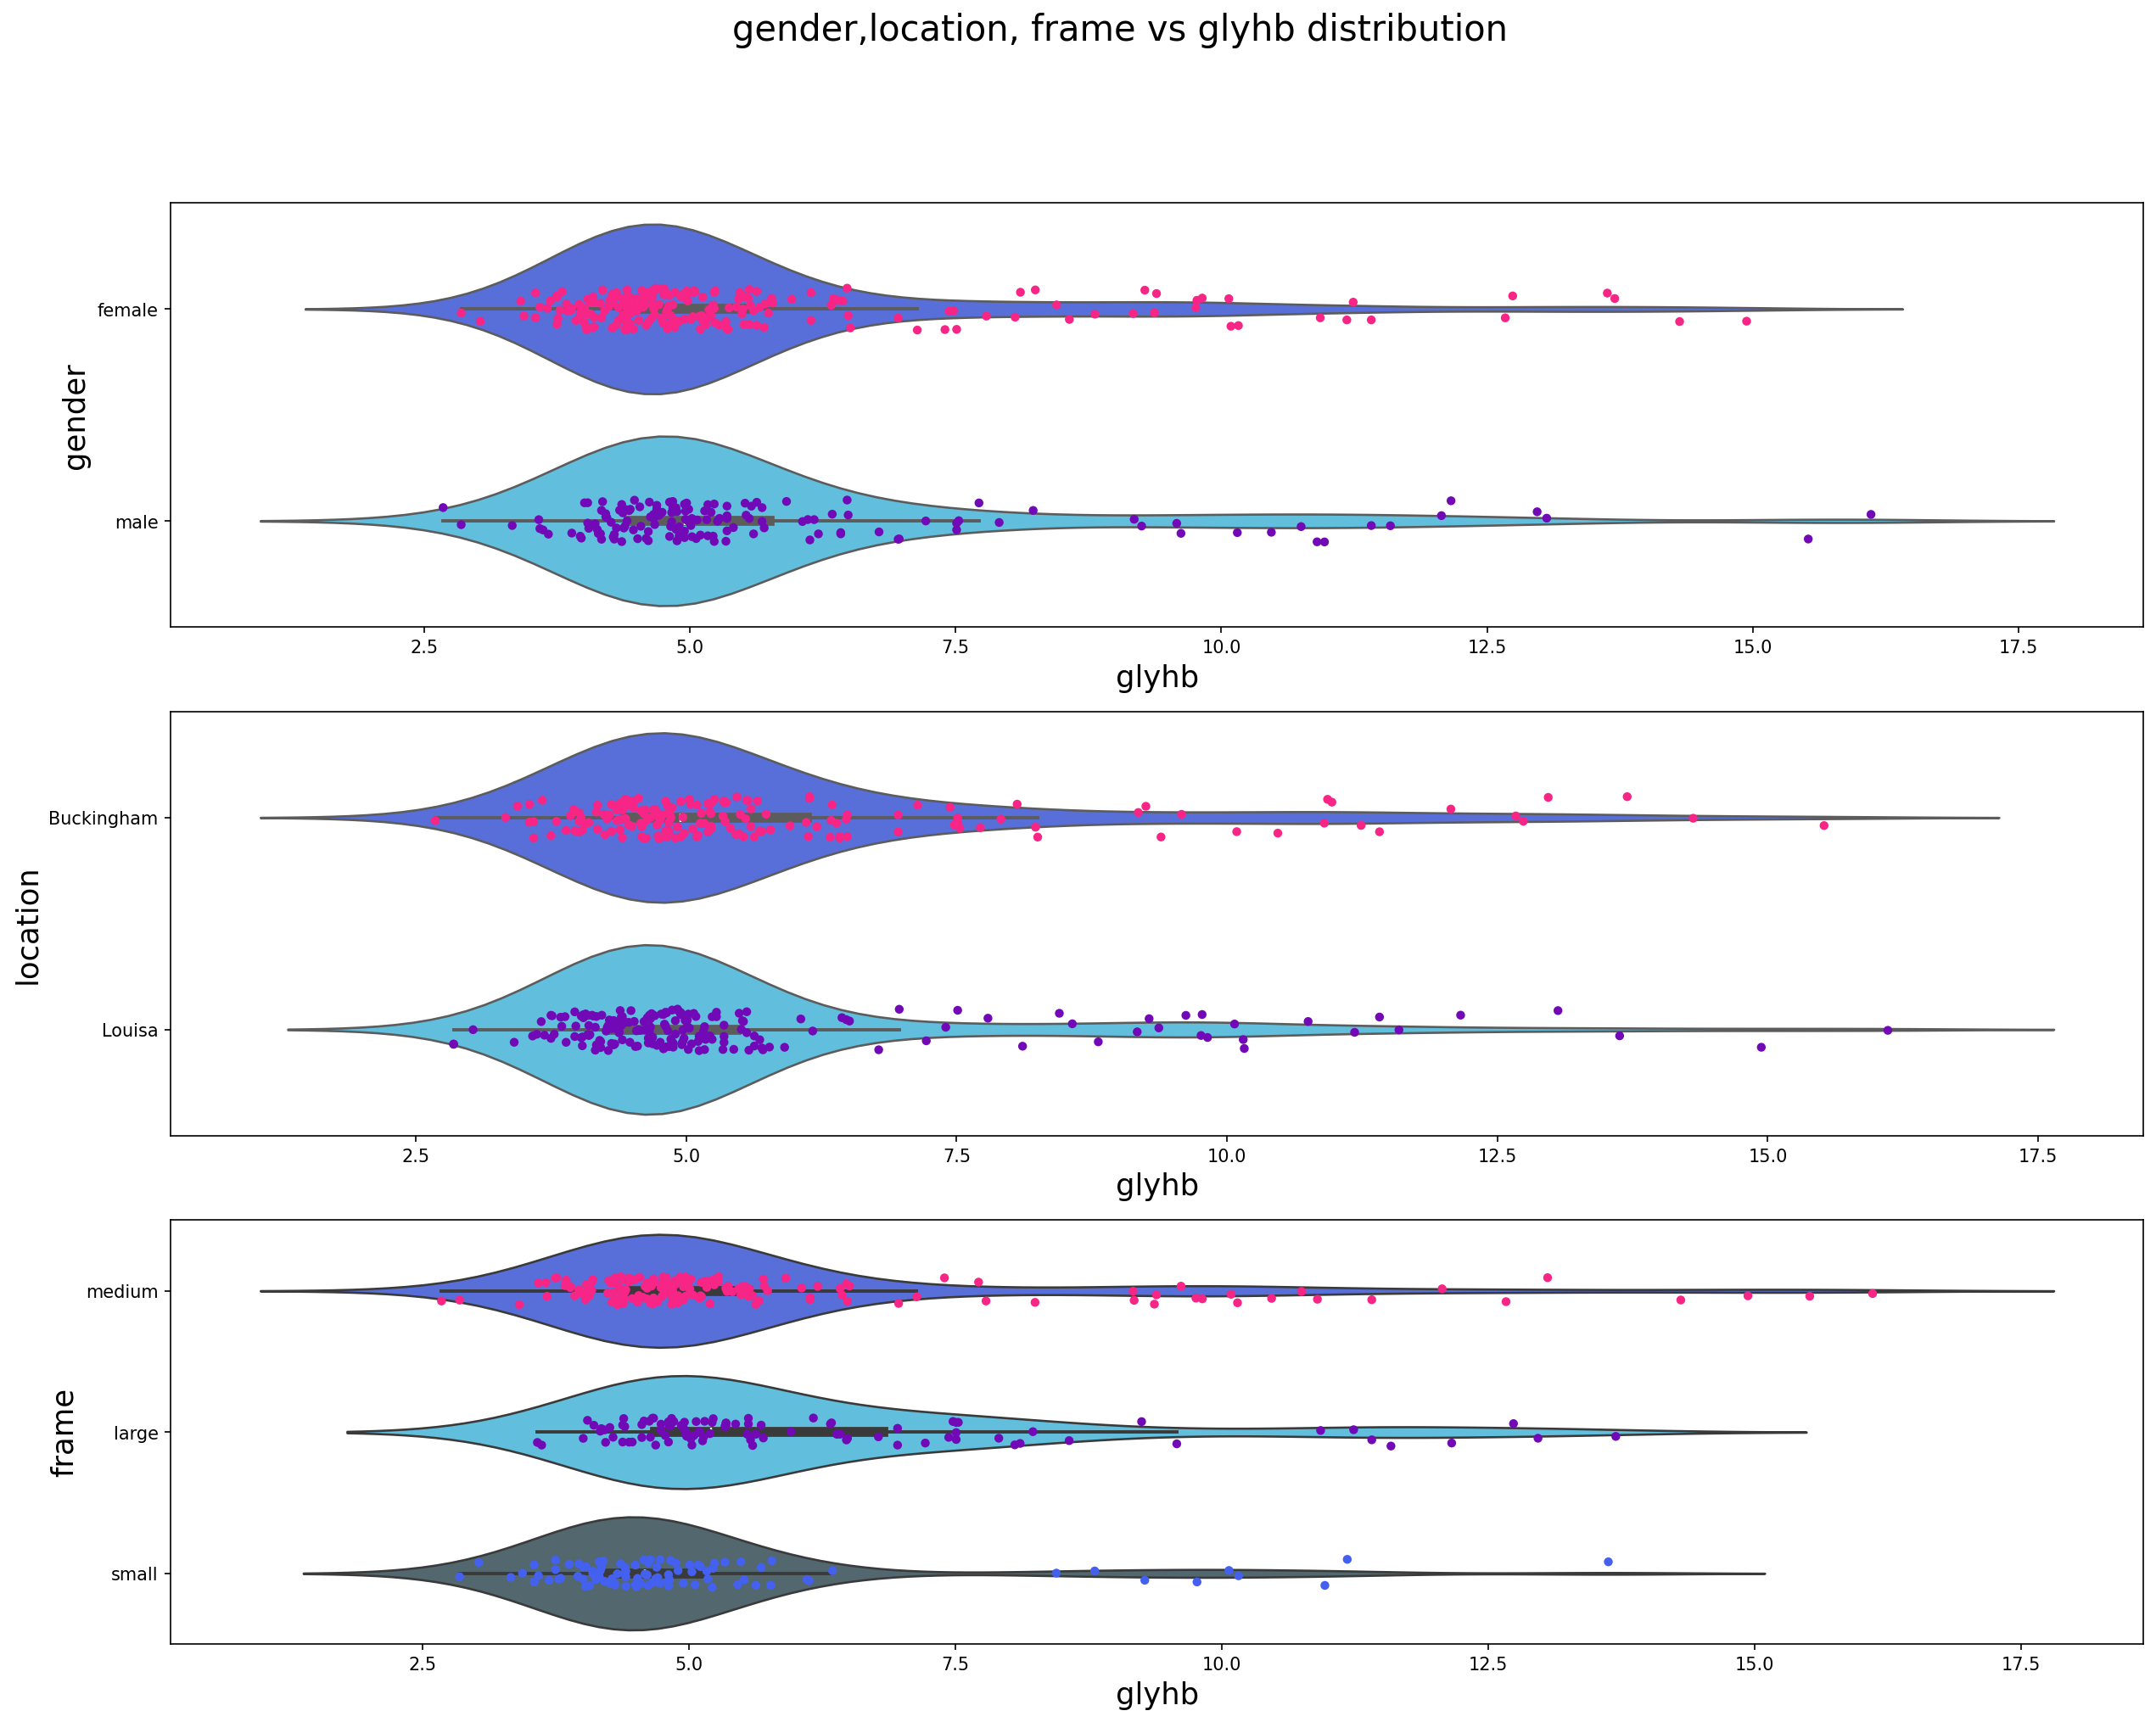

In [20]:
import matplotlib.pyplot as plt

# Paleta de cores para o gráfico de stripplot
palette1 = ["#F72585", "#7209B7", "#4361EE"]

# Paleta de cores para o gráfico de violinplot
palette2 = ["#4361EE", "#4CC9F0", '#4d6a73']

# Criar uma figura e eixos com 3 linhas e 1 coluna
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 15), dpi=150)

# Título da figura
fig.suptitle('gender, location, frame vs glyhb distribution', fontsize=20)

# Para cada característica categórica, criar um gráfico de stripplot e um gráfico de violinplot
for i, j in enumerate(categorical):
    # Gráfico de stripplot
    ax = sns.stripplot(x="glyhb", y=j, data=df3, palette=palette1, orient='h', ax=axes[i])
    # Gráfico de violinplot
    ax = sns.violinplot(x="glyhb", y=j, data=df3, palette=palette2, orient='h', ax=axes[i])
    # Definir rótulos dos eixos
    ax.set_xlabel('glyhb', fontsize=17)
    ax.set_ylabel(j, fontsize=17)

# Exibir os gráficos
plt.show()

In [22]:
# Lista para armazenar os diagnósticos de diabetes
diabet_list = []

# Loop sobre os valores de glicose no sangue (glyhb)
for i in df3['glyhb']:
    # Verificar se o valor está na faixa "normal"
    if i <= 5.7:
        diabet_list.append('normal')
    # Verificar se o valor está na faixa "pré-diabético"
    elif 5.7 < i <= 6.4:
        diabet_list.append('prediabetic')
    # Se não estiver nas faixas anteriores, considerar como "diabético"
    else:
        diabet_list.append('diabetic')

In [25]:
# Criar um DataFrame com a lista de diagnósticos de diabetes
diabet_df = pd.DataFrame({"Diabetes": diabet_list})

In [26]:
# Criar uma cópia do DataFrame df3 e armazená-la em df4
df4 = df3.copy()

# Inserir a coluna "Diabetes" na posição 16 do DataFrame df4
df4.insert(16, "Diabetes", diabet_df["Diabetes"])

In [27]:
# Remover a coluna "index" do DataFrame df4
df4.drop(columns=['index'], inplace=True)

# Exibir o DataFrame df4 atualizado
df4

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,Diabetes,glyhb
0,203.0,82,56.0,3.6,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,normal,4.310000
1,165.0,97,24.0,6.9,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,normal,4.440000
2,228.0,92,37.0,6.2,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,normal,4.640000
3,78.0,93,12.0,6.5,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,normal,4.630000
4,249.0,90,28.0,8.9,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,diabetic,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,301.0,90,118.0,2.6,Louisa,89,female,61.0,115.0,medium,218.0,90.0,31.0,41.0,210.0,normal,4.280000
362,296.0,369,46.0,6.4,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,diabetic,16.110001
363,284.0,89,54.0,5.3,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,normal,4.390000
364,194.0,269,38.0,5.1,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,diabetic,13.630000


In [33]:
# Obter os valores únicos na coluna "Diabetes"
Diabetic_uniq = df4["Diabetes"].unique()

# Contar o número de ocorrências de cada valor na coluna "Diabetes"
Diabetic_count = df4["Diabetes"].value_counts()

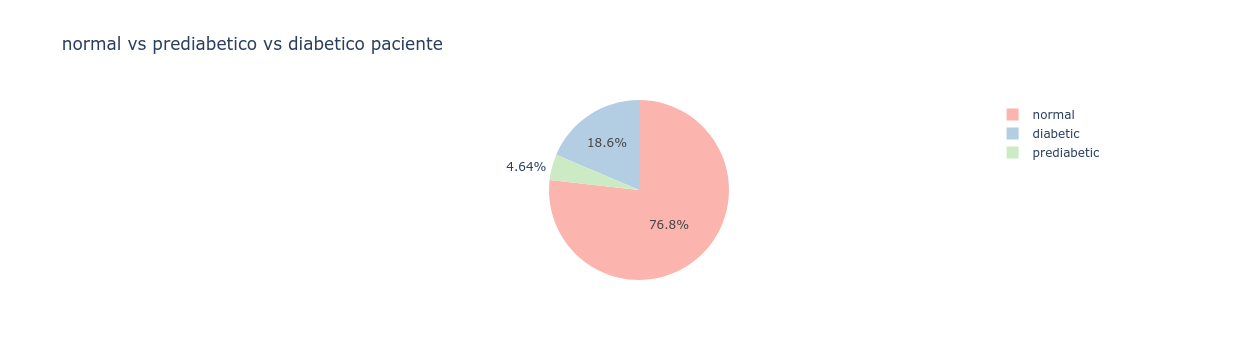

In [35]:
# Criar um gráfico de pizza com os valores únicos e contagem de diagnósticos de diabetes
fig = px.pie(values=Diabetic_count,               # Valores para cada categoria
             names=Diabetic_uniq,                 # Nomes das categorias
             color_discrete_sequence=px.colors.qualitative.Pastel1,  # Sequência de cores
             title="Normal vs Pré-diabético vs Diabético")   # Título do gráfico

# Exibir o gráfico
fig.show()

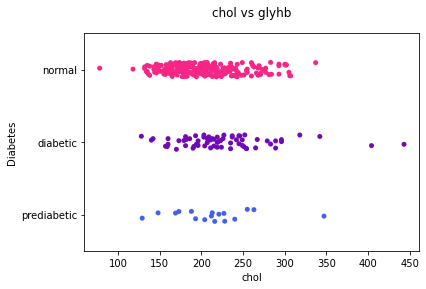

In [36]:
# Definir uma paleta de cores para o gráfico de stripplot
palette = ["#F72585", "#7209B7", "#4361EE", "#4CC9F0", '#4d6a73']

# Criar um gráfico de stripplot com colesterol (chol) no eixo x, diagnóstico de diabetes (Diabetes) no eixo y e cor codificada pelo diagnóstico de diabetes
sns.stripplot(x=df4['chol'], y=df4['Diabetes'], hue=df4['Diabetes'], palette=palette)

# Definir o título do gráfico
plt.title("Chol vs Glyhb", y=1.05)

# Exibir o gráfico
plt.show()

In [39]:
#paleta de cores para a tabela de baixo
palette1 = ["#F72585", "#7209B7", "#4361EE"]

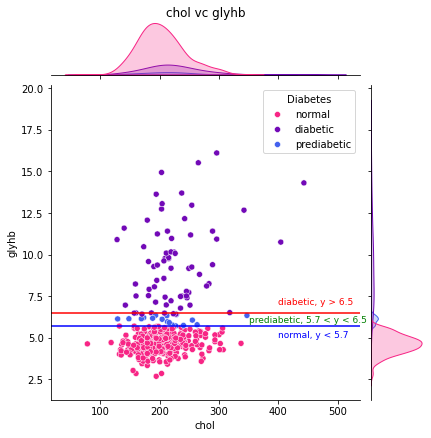

In [40]:
# Criar um gráfico de jointplot com colesterol (chol) no eixo x, glicose no sangue (glyhb) no eixo y, e a cor representando o diagnóstico de diabetes
sns.jointplot(x="chol", y='glyhb', hue='Diabetes', kind="scatter", data=df4, palette=palette1)

# Adicionar linhas horizontais para indicar diferentes faixas de diagnóstico de diabetes
plt.axhline(y=5.7, color='blue')  # Limite para glicose no sangue normal
plt.axhline(y=6.5, color='red')   # Limite para glicose no sangue diabética

# Adicionar legendas para as linhas horizontais
plt.text(400, 5, 'normal, y < 5.7', fontsize=9, color='blue')
plt.text(350, 5.9, 'prediabetic, 5.7 < y < 6.5', fontsize=9, color='green')
plt.text(400, 7, 'diabetic, y > 6.5', fontsize=9, color='red')

# Definir o título do gráfico
plt.title("Chol vs Glyhb", y=1.2)

# Exibir o gráfico
plt.show()

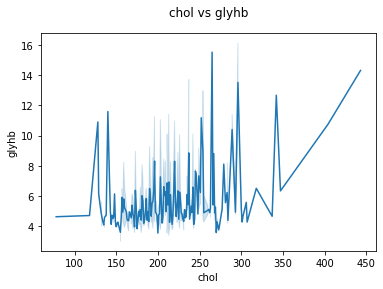

In [44]:
# Criar um gráfico de linha com colesterol (chol) no eixo x e glicose no sangue (glyhb) no eixo y
sns.lineplot(x=df4['chol'], y=df4['glyhb'])

# Definir rótulos para os eixos x e y
plt.xlabel("Chol")
plt.ylabel("Glyhb")

# Definir o título do gráfico
plt.title("Chol vs Glyhb", y=1.05)

# Exibir o gráfico
plt.show()

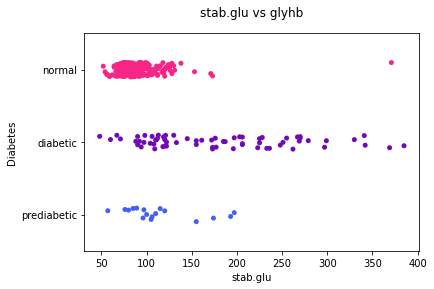

In [43]:
# Criar um gráfico de stripplot com glicose estável (stab.glu) no eixo x, diagnóstico de diabetes (Diabetes) no eixo y e cor codificada pelo diagnóstico de diabetes
sns.stripplot(x=df4['stab.glu'], y=df4['Diabetes'], hue=df4['Diabetes'], palette=palette)

# Definir o título do gráfico
plt.title("Stab.glu vs Glyhb", y=1.05)

# Exibir o gráfico
plt.show()

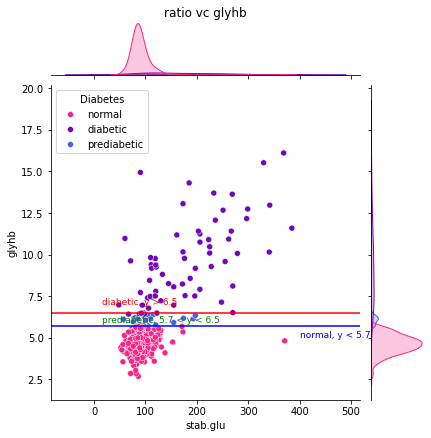

In [45]:
# Criar um gráfico de jointplot com glicose estável (stab.glu) no eixo x, glicose no sangue (glyhb) no eixo y e a cor representando o diagnóstico de diabetes
sns.jointplot(x="stab.glu", y='glyhb', hue='Diabetes', kind="scatter", data=df4, palette=palette1)

# Adicionar linhas horizontais para indicar diferentes faixas de diagnóstico de diabetes
plt.axhline(y=5.7, color='blue')  # Limite para glicose no sangue normal
plt.axhline(y=6.5, color='red')   # Limite para glicose no sangue diabética

# Adicionar legendas para as linhas horizontais
plt.text(400, 5, 'normal, y < 5.7', fontsize=9, color='blue')
plt.text(15, 5.9, 'prediabetic, 5.7 < y < 6.5', fontsize=9, color='green')
plt.text(15, 7, 'diabetic, y > 6.5', fontsize=9, color="red")

# Definir o título do gráfico
plt.title("Stab.glu vs Glyhb", y=1.2)

# Exibir o gráfico
plt.show()

In [46]:
df4_num = df4.copy()

In [48]:
# Substituir os valores categóricos por valores numéricos no DataFrame df4_num

# Substituir os valores 'Buckingham' e 'Louisa' na coluna 'location'
df4_num['location'].replace({'Buckingham': 2, 'Louisa': 3}, inplace=True)

# Substituir os valores 'male' e 'female' na coluna 'gender'
df4_num['gender'].replace({'male': 2, 'female': 3}, inplace=True)

# Substituir os valores 'medium', 'large' e 'small' na coluna 'frame'
df4_num['frame'].replace({'medium': 2, 'large': 3, 'small': 4}, inplace=True)

# Substituir os valores 'normal', 'prediabetic' e 'diabetic' na coluna 'Diabetes'
df4_num['Diabetes'].replace({'normal': 2, 'prediabetic': 3, 'diabetic': 4}, inplace=True)

# Exibir o DataFrame df4_num atualizado
df4_num

,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,Diabetes,glyhb
0,203.0,82,56.0,3.6,2,46,3,62.0,121.0,2,118.0,59.0,29.0,38.0,720.0,2,4.310000
1,165.0,97,24.0,6.9,2,29,3,64.0,218.0,3,112.0,68.0,46.0,48.0,360.0,2,4.440000
2,228.0,92,37.0,6.2,2,58,3,61.0,256.0,3,190.0,92.0,49.0,57.0,180.0,2,4.640000
3,78.0,93,12.0,6.5,2,67,2,67.0,119.0,3,110.0,50.0,33.0,38.0,480.0,2,4.630000
4,249.0,90,28.0,8.9,2,64,2,68.0,183.0,2,138.0,80.0,44.0,41.0,300.0,4,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,301.0,90,118.0,2.6,3,89,3,61.0,115.0,2,218.0,90.0,31.0,41.0,210.0,2,4.280000
362,296.0,369,46.0,6.4,3,53,2,69.0,173.0,2,138.0,94.0,35.0,39.0,210.0,4,16.110001
363,284.0,89,54.0,5.3,3,51,3,63.0,154.0,2,140.0,100.0,32.0,43.0,180.0,2,4.390000
364,194.0,269,38.0,5.1,3,29,3,69.0,167.0,4,120.0,70.0,33.0,40.0,20.0,4,13.630000


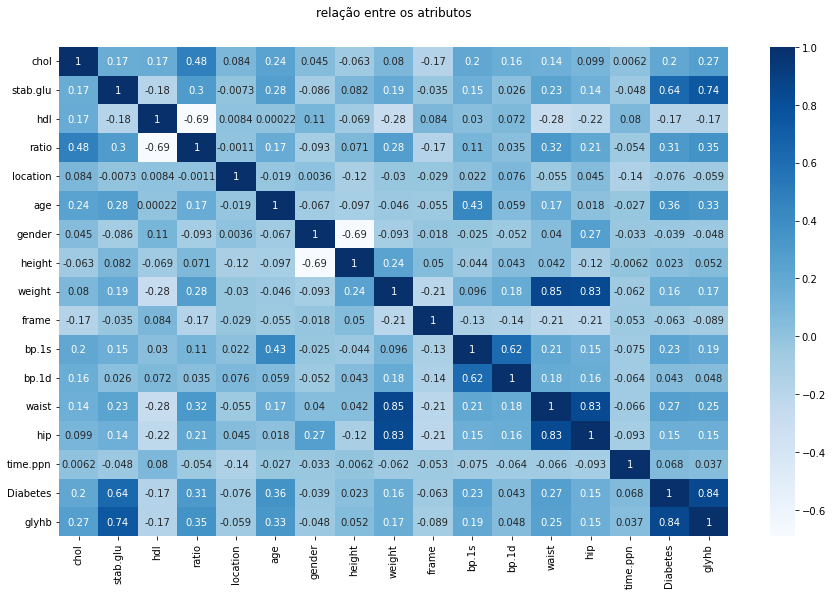

In [51]:
# Configurar a paleta de cores para o gráfico
sns.set_palette("cubehelix")

# Criar um gráfico de heatmap da matriz de correlação do DataFrame df4_num
plt.figure(figsize=(15, 9))
sns.heatmap(df4_num.corr(), annot=True, cmap="Blues")  # Adicionando anotações e definindo o mapa de cores
plt.title('Relação entre os atributos', y=1.05)  # Definir o título do gráfico
plt.show()

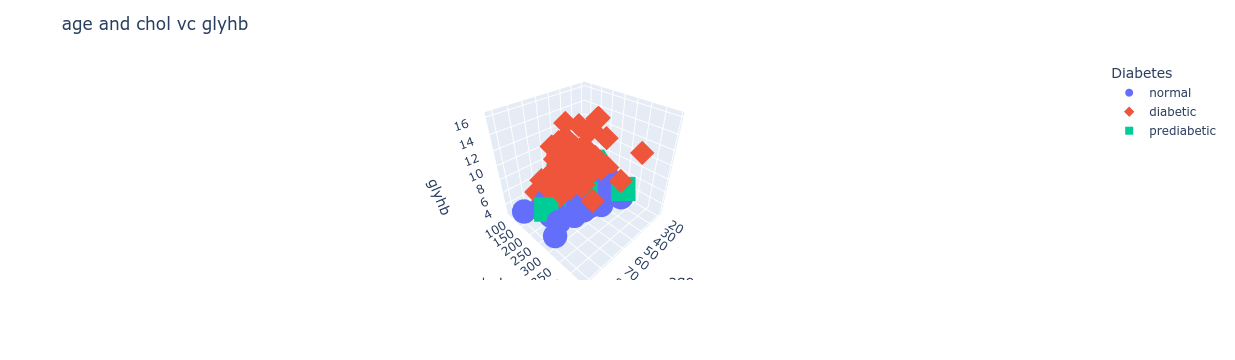

In [52]:
# Criar um gráfico de dispersão tridimensional com idade (age) no eixo x, colesterol (chol) no eixo y, glicose no sangue (glyhb) no eixo z,
# a cor representando o diagnóstico de diabetes e o símbolo representando o diagnóstico de diabetes
fig = px.scatter_3d(df4, x='age', y='chol', z='glyhb', color='Diabetes', symbol='Diabetes')

# Atualizar o layout do gráfico com o título desejado
fig.update_layout(title_text=("Age and Chol vs Glyhb"))

# Exibir o gráfico
fig.show()

In [53]:
df_num = df4.copy()
df_num.drop(columns=['location', 'gender', 'frame'], inplace = True)
df_num

,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,waist,hip,time.ppn,Diabetes,glyhb
0,203.0,82,56.0,3.6,46,62.0,121.0,118.0,59.0,29.0,38.0,720.0,normal,4.310000
1,165.0,97,24.0,6.9,29,64.0,218.0,112.0,68.0,46.0,48.0,360.0,normal,4.440000
2,228.0,92,37.0,6.2,58,61.0,256.0,190.0,92.0,49.0,57.0,180.0,normal,4.640000
3,78.0,93,12.0,6.5,67,67.0,119.0,110.0,50.0,33.0,38.0,480.0,normal,4.630000
4,249.0,90,28.0,8.9,64,68.0,183.0,138.0,80.0,44.0,41.0,300.0,diabetic,7.720000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,301.0,90,118.0,2.6,89,61.0,115.0,218.0,90.0,31.0,41.0,210.0,normal,4.280000
362,296.0,369,46.0,6.4,53,69.0,173.0,138.0,94.0,35.0,39.0,210.0,diabetic,16.110001
363,284.0,89,54.0,5.3,51,63.0,154.0,140.0,100.0,32.0,43.0,180.0,normal,4.390000
364,194.0,269,38.0,5.1,29,69.0,167.0,120.0,70.0,33.0,40.0,20.0,diabetic,13.630000


In [54]:
data_mean = df_num.groupby(pd.Grouper(key = "Diabetes"), as_index = False).mean()
data_mean

,Diabetes,chol,stab.glu,hdl,ratio,age,height,weight,bp.1s,bp.1d,waist,hip,time.ppn,glyhb
0,normal,202.711744,89.637011,51.843416,4.236655,43.451957,65.996441,174.594306,134.380783,83.174377,37.067616,42.601423,330.693950,4.632028
1,diabetic,225.691176,178.955882,44.529412,5.598529,57.794118,66.205882,191.338235,148.529412,85.044118,40.985294,44.750000,393.823529,9.521029
2,prediabetic,213.294118,115.000000,47.117647,5.241176,55.823529,66.352941,183.294118,137.470588,79.764706,40.000000,43.705882,257.941176,6.072941


In [56]:
normal = (data_mean['chol'][0],data_mean['stab.glu'][0],data_mean['hdl'][0],data_mean['ratio'][0],data_mean['age'][0],data_mean['height'][0],data_mean['weight'][0],data_mean['bp.1s'][0],data_mean['bp.1d'][0],data_mean['waist'][0],data_mean['hip'][0],data_mean['time.ppn'][0])

diabetic= (data_mean['chol'][1],data_mean['stab.glu'][1],data_mean['hdl'][1],data_mean['ratio'][1],data_mean['age'][1],data_mean['height'][1],data_mean['weight'][1],data_mean['bp.1s'][1],data_mean['bp.1d'][1],data_mean['waist'][1],data_mean['hip'][1],data_mean['time.ppn'][1])

prediabetic = (data_mean['chol'][2],data_mean['stab.glu'][2],data_mean['hdl'][2],data_mean['ratio'][2],data_mean['age'][2],data_mean['height'][2],data_mean['weight'][2],data_mean['bp.1s'][2],data_mean['bp.1d'][2],data_mean['waist'][2],data_mean['hip'][2],data_mean['time.ppn'][2])

x = ["chol", 'stab.glu', 'hdl', 'ratio', 'age', 'height', 'weigth', 'bp.1s', 'bp.1d', 'waist', 'hip', 'time.ppn']

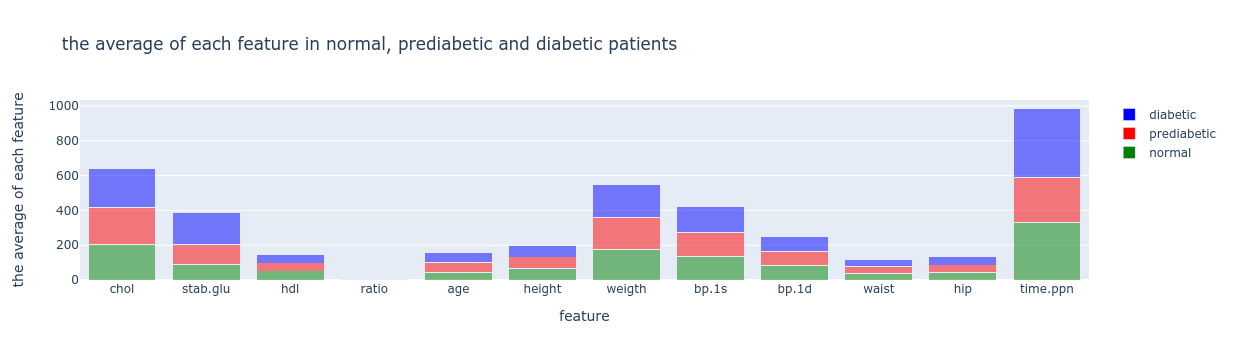

In [58]:
trace1=go.Bar(x=x,y=normal,marker=dict(color='green',opacity=0.5),name="normal")
trace2=go.Bar(x=x,y=prediabetic,marker=dict(color='red',opacity=0.5),name="prediabetic")
trace3=go.Bar(x=x,y=diabetic,marker=dict(color='blue',opacity=0.5),name="diabetic")

data=[trace1,trace2,trace3]

layout = go.Layout(title=" the average of each feature in normal, prediabetic and diabetic patients",xaxis=dict(title="feature"),yaxis=dict(title="the average of each feature"),
                   barmode="stack")

fig = go.Figure(data,layout)

fig.show()

In [98]:
df5 = df4.copy()

# Calcular o IMC (Índice de Massa Corporal)
df5['IMC'] = df5['weight'] / ((df5['height'] / 100) ** 2)

# Categorizar o IMC de acordo com as faixas da OMS
def categorize_imc(imc):
    
    if imc < 18.5:
        return 'Abaixo do peso'
    elif 18.5 <= imc < 25:
        return 'Peso normal'
    elif 25 <= imc < 30:
        return 'Sobrepeso'
    else:
        return 'Obesidade'
# Criar a coluna IMC_Category usando a função categorize_imc
df5['IMC_Category'] = df5['IMC'].apply(categorize_imc)
# Mostrar a distribuição de valores na coluna IMC_Category
print(df5['IMC_Category'].value_counts())
df5

IMC_Category
Obesidade    366
Name: count, dtype: int64


,chol,stab.glu,hdl,ratio,location,age,gender,height,weight,frame,bp.1s,bp.1d,waist,hip,time.ppn,Diabetes,glyhb,IMC_Category,IMC
0,203.0,82,56.0,3.6,Buckingham,46,female,62.0,121.0,medium,118.0,59.0,29.0,38.0,720.0,normal,4.310000,Obesidade,314.776275
1,165.0,97,24.0,6.9,Buckingham,29,female,64.0,218.0,large,112.0,68.0,46.0,48.0,360.0,normal,4.440000,Obesidade,532.226562
2,228.0,92,37.0,6.2,Buckingham,58,female,61.0,256.0,large,190.0,92.0,49.0,57.0,180.0,normal,4.640000,Obesidade,687.987100
3,78.0,93,12.0,6.5,Buckingham,67,male,67.0,119.0,large,110.0,50.0,33.0,38.0,480.0,normal,4.630000,Obesidade,265.092448
4,249.0,90,28.0,8.9,Buckingham,64,male,68.0,183.0,medium,138.0,80.0,44.0,41.0,300.0,diabetic,7.720000,Obesidade,395.761246
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,301.0,90,118.0,2.6,Louisa,89,female,61.0,115.0,medium,218.0,90.0,31.0,41.0,210.0,normal,4.280000,Obesidade,309.056705
362,296.0,369,46.0,6.4,Louisa,53,male,69.0,173.0,medium,138.0,94.0,35.0,39.0,210.0,diabetic,16.110001,Obesidade,363.369040
363,284.0,89,54.0,5.3,Louisa,51,female,63.0,154.0,medium,140.0,100.0,32.0,43.0,180.0,normal,4.390000,Obesidade,388.007055
364,194.0,269,38.0,5.1,Louisa,29,female,69.0,167.0,small,120.0,70.0,33.0,40.0,20.0,diabetic,13.630000,Obesidade,350.766646


In [84]:
print(df5.isnull().sum())
print(df5.describe())

chol            0
stab.glu        0
hdl             0
ratio           0
location        0
age             0
gender          0
height          0
weight          0
frame           0
bp.1s           0
bp.1d           0
waist           0
hip             0
time.ppn        0
Diabetes        0
glyhb           0
IMC_Category    0
IMC             0
dtype: int64
             chol    stab.glu         hdl       ratio         age      height   
count  366.000000  366.000000  366.000000  366.000000  366.000000  366.000000  \
mean   207.472678  107.409836   50.265027    4.536339   46.691257   66.051913   
std     44.032840   54.106909   17.143815    1.759161   16.296744    3.883937   
min     78.000000   48.000000   12.000000    1.500000   19.000000   52.000000   
25%    179.000000   81.000000   38.000000    3.200000   34.000000   63.000000   
50%    203.500000   90.000000   46.000000    4.200000   45.000000   66.000000   
75%    228.750000  108.000000   59.000000    5.400000   60.000000   69.000000 

In [112]:
# Mostrar a distribuição de valores nas colunas IMC e IMC_Category
print(df5[['IMC', 'IMC_Category']].value_counts())


IMC     IMC_Category
428.30  Obesidade       3
430.60  Obesidade       3
356.40  Obesidade       3
433.10  Obesidade       3
390.50  Obesidade       3
                       ..
375.30  Obesidade       1
376.50  Obesidade       1
376.90  Obesidade       1
381.60  Obesidade       1
793.50  Obesidade       1
Name: count, Length: 310, dtype: int64


In [91]:
print(df5[['weight', 'height']].describe())

           weight      height
count  366.000000  366.000000
mean   178.109290   66.051913
std     40.680567    3.883937
min     99.000000   52.000000
25%    151.000000   63.000000
50%    174.000000   66.000000
75%    200.000000   69.000000
max    325.000000   76.000000
